<a href="https://colab.research.google.com/github/AndreyBarTF/turbines_autumn_2022-Homework/blob/GAS-%D0%94%D0%97.2/GAS-dz.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   ФИО Барбашин Андрей Алексеевич
*   Группа ТФэ-01-20
*   Тлеграмм @QwertyAlexx

## Домашняя работа
Построить графики зависимостией $\varphi(\varepsilon)$, $\eta_i(\varepsilon)$, $H(\varepsilon)$, для $\eta_т$=0.88, $\eta_к$ = 0.85, при различных значениях температуры перед газовой турбиной $T_c$ и температурой воздуха перед компрессором $t_a=0$ C. m = 0.25, $\delta == \varepsilon$, $\eta_{кс}$ = 1. 

$t_c$ = 400, 500, 600, 700, 800, 900, 1200, 1400 C

Найти оптимум по мощности и по КПД для температуры $t_c$ = 1200 и построить на графиках в этих точках вертикальную линию (или поставить заметную точку на соответствующей кривой)

In [21]:
import matplotlib.pyplot as plt
import numpy as np
to_kelvin = lambda x: x + 273.15
MPa = 1e6

#Исходные данные
turbine_efficiency = 0.88
compressor_efficiency = 0.85
T_a = to_kelvin(0)
m = 0.25
#дельта == эпсилон
combustor_efficiency = 1
t_с = np.arange(400,1500,100)
T_c = list(map(to_kelvin,t_с))
eps = np.arange(1,80,0.5)
Cp_air = 1007
Cp_gas = 1225
Cp = (Cp_air + Cp_gas) / 2

#расчет полезной работы(фи)
def work_coefficient(T_a, T_c, eps):
  w_c = dict()
  tau =[]
  for value in T_c:
    w_c[value]= []
    tau.append(value / T_a)
    i = 0
  for value in tau:
    value2 = T_c[i]
    for epsilon in eps:
      num = epsilon ** m
      denum = value * turbine_efficiency * compressor_efficiency
      work_coeff = 1 - num/denum
      w_c[value2].append(work_coeff)
    i = i + 1
  return w_c

#расчет КПД
def efficiency(T_a, T_c, eps):
  eff_ = dict()  
  tau =[]
  for value in T_c:
    eff_[value] = []
    tau.append(value / T_a)
  i = 0
  for value in tau:
    value1 = T_c[i] 
    for epsilon in eps:
      num_1 = value * turbine_efficiency * (1 - epsilon ** (-m))
      num_2 = ((epsilon ** m) - 1) / compressor_efficiency
      denum = value - 1 - (epsilon ** m - 1) / compressor_efficiency
      eff = (num_1 - num_2) / denum
      eff_[value1].append(eff)
    i = i + 1
  return eff_

#расчет полезной работы за цикл
def useful_cycle_work(T_a, T_c, eps): 
  u_c_w = dict()
  for value in T_c:
    u_c_w[value]= []
    for epsilon in eps:  
      H_t = Cp * value * (1 - epsilon ** (-m)) * turbine_efficiency
      H_k = Cp * T_a * ((epsilon ** m) - 1) / compressor_efficiency
      ucw = (H_t - H_k) / 1000
      u_c_w[value].append(ucw)
  return u_c_w

useful_cycle_work = useful_cycle_work(T_a, T_c, eps)
efficiency = efficiency(T_a, T_c, eps)
work_coefficient = work_coefficient(T_a, T_c, eps)
#print(efficiency[1473.15])
#def eff_once(T_a, T_c, epsilon): 
#  value = T_c / T_a
#  num_1 = value * turbine_efficiency * (1 - epsilon ** (-m))
#  num_2 = ((epsilon ** m) - 1) / compressor_efficiency
#  denum = value - 1 - (epsilon ** m - 1) / compressor_efficiency
#  eff = (num_1 - num_2) / denum
#  return eff

def eff_once(T_a, T_c, epsilon): 
  H_t = Cp * T_c * (1 - epsilon ** (-m)) * turbine_efficiency
  H_k = Cp * T_a * ((epsilon ** m) - 1) / compressor_efficiency
  T_b = T_a + (H_k / Cp_air)
  q_comb = Cp * (T_c - T_b) * (1 / combustor_efficiency)
  eff = (H_t - H_k) / q_comb
  return eff


def useful_cycle_work_onec(T_a, T_c, epsilon):   
  H_t = Cp * T_c * (1 - epsilon ** (-m)) * turbine_efficiency
  H_k = Cp * T_a * ((epsilon ** m) - 1) / compressor_efficiency
  ucw = (H_t - H_k) / 1000
  return ucw
#Определение оптимумов при температуре 1200 С

T_1200 = to_kelvin(1200)
stepen = 1 / (2 * m)
eps_opt_H = ((T_1200 / T_a) * turbine_efficiency * compressor_efficiency) ** stepen
max_eff_1200 = max(efficiency[T_1200])
eps_opt_eff = ((T_1200 / T_a) * turbine_efficiency * compressor_efficiency) / (1 - max_eff_1200) ** stepen
eff_opt = eff_once(T_a, T_1200, eps_opt_eff)
H_opt = useful_cycle_work_onec(T_a, T_1200, eps_opt_H)
print('оптимальная степень сжатия по кпд ', eps_opt_eff)
print('оптмальный кпд', eff_opt)
print("оптимальная степень сжатия по полезной работе", eps_opt_H)
print("полезная работа", H_opt)

оптимальная степень сжатия по кпд  11.730401533821441
оптмальный кпд 0.3595339777310137
оптимальная степень сжатия по полезной работе 16.27401553468851
полезная работа 364.7586751820972


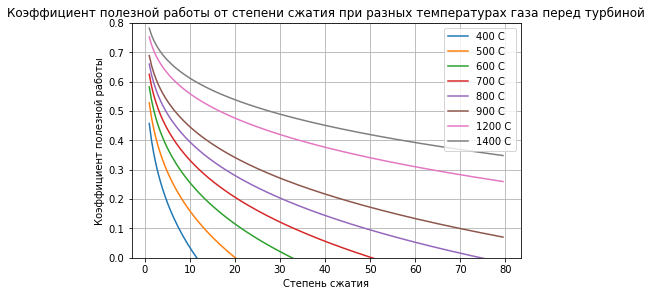

In [3]:
x = eps

plt.figure(layout = 'constrained')
plt.plot(x, work_coefficient[673.15], label = '400 C')  
plt.plot(x, work_coefficient[773.15], label = '500 C')  
plt.plot(x, work_coefficient[873.15], label = '600 C')
plt.plot(x, work_coefficient[973.15], label = '700 C')
plt.plot(x, work_coefficient[1073.15], label = '800 C')
plt.plot(x, work_coefficient[1173.15], label = '900 C')
plt.plot(x, work_coefficient[1473.15], label = '1200 C')
plt.plot(x, work_coefficient[1673.15], label = '1400 C')

plt.ylim([0,0.8])

plt.xlabel('Степень сжатия')
plt.ylabel('Коэффициент полезной работы')
plt.title("Коэффициент полезной работы от степени сжатия при разных температурах газа перед турбиной")
plt.legend();
plt.grid()

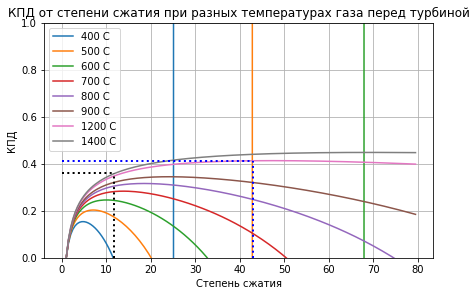

In [31]:
x = eps
plt.figure(layout = 'constrained')
plt.plot(x, efficiency[673.15], label = '400 C')  
plt.plot(x, efficiency[773.15], label = '500 C')  
plt.plot(x, efficiency[873.15], label = '600 C')
plt.plot(x, efficiency[973.15], label = '700 C')
plt.plot(x, efficiency[1073.15], label = '800 C')
plt.plot(x, efficiency[1173.15], label = '900 C')
plt.plot(x, efficiency[1473.15], label = '1200 C')
plt.plot(x, efficiency[1673.15], label = '1400 C')
plt.ylim([0,1])

plt.vlines(eps_opt_eff, 0, eff_opt, color = 'k', linewidth = 2, linestyle = ':')
plt.hlines(eff_opt, 0, eps_opt_eff, color = 'k', linewidth = 2, linestyle = ':') 

plt.vlines(43, 0, max_eff_1200, color = 'b', linewidth = 2, linestyle = ':')
plt.hlines(max_eff_1200, 0, 43, color = 'b', linewidth = 2, linestyle = ':') 

plt.xlabel('Степень сжатия')
plt.ylabel('КПД')
plt.title("КПД от степени сжатия при разных температурах газа перед турбиной")
plt.legend();
plt.grid()

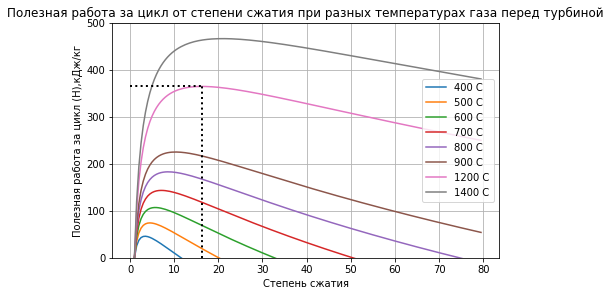

In [5]:
x = eps
plt.figure(layout = 'constrained')
plt.plot(x, useful_cycle_work[673.15], label = '400 C')  
plt.plot(x, useful_cycle_work[773.15], label = '500 C')  
plt.plot(x, useful_cycle_work[873.15], label = '600 C')
plt.plot(x, useful_cycle_work[973.15], label = '700 C')
plt.plot(x, useful_cycle_work[1073.15], label = '800 C')
plt.plot(x, useful_cycle_work[1173.15], label = '900 C')
plt.plot(x, useful_cycle_work[1473.15], label = '1200 C')
plt.plot(x, useful_cycle_work[1673.15], label = '1400 C')
plt.ylim([0,500])

plt.vlines(eps_opt_H, 0, H_opt, color = 'k', linewidth = 2, linestyle = ':')
plt.hlines(H_opt, 0, eps_opt_H, color = 'k', linewidth = 2, linestyle = ':') 

plt.xlabel('Степень сжатия')
plt.ylabel('Полезная работа за цикл (H),кДж/кг')
plt.title("Полезная работа за цикл от степени сжатия при разных температурах газа перед турбиной")
plt.legend();
plt.grid()